## Desciption

This model predicts if a promoter's gene is 'active' in M9, based on the Urtecho 2023 data.

In [1]:
import CNN_Urtecho_LB_M9_active_1_0 as parent

In [2]:
name = 'CNN_Urtecho_M9_active_1_0'

In [3]:
import pandas as pd

# Load data
file_path = '../Data/Urtecho_2023/Urtecho_2023_LB_M9.csv'
df = pd.read_csv(file_path)[['promoter_sequence', 'M9_active']]

# Preprocess data
X = df['promoter_sequence']
y = df['M9_active']
X, _ = parent.preprocess_sequences(X)

In [4]:
X.shape

(4455, 2251, 4)

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 52s 174ms/step - accuracy: 0.7694 - loss: 0.4863 - val_accuracy: 0.8182 - val_loss: 0.4423
Epoch 2/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.8197 - loss: 0.3955 - val_accuracy: 0.8272 - val_loss: 0.4292
Epoch 3/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - accuracy: 0.8404 - loss: 0.3654 - val_accuracy: 0.8092 - val_loss: 0.4559
Epoch 4/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.8615 - loss: 0.3318 - val_accuracy: 0.7890 - val_loss: 0.4506
Epoch 5/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 131ms/step - accuracy: 0.9098 - loss: 0.2356 - val_accuracy: 0.8047 - val_loss: 0.5205
Epoch 6/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9403 - loss: 0.1696 - val_accuracy: 0.7856 - val_loss: 0.5994
Epoch 7/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - accuracy: 0.9730 - loss: 0.1014 - val_accuracy: 0.7890 - val_loss: 0.7888
Epoch 8/150
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.9884 -

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


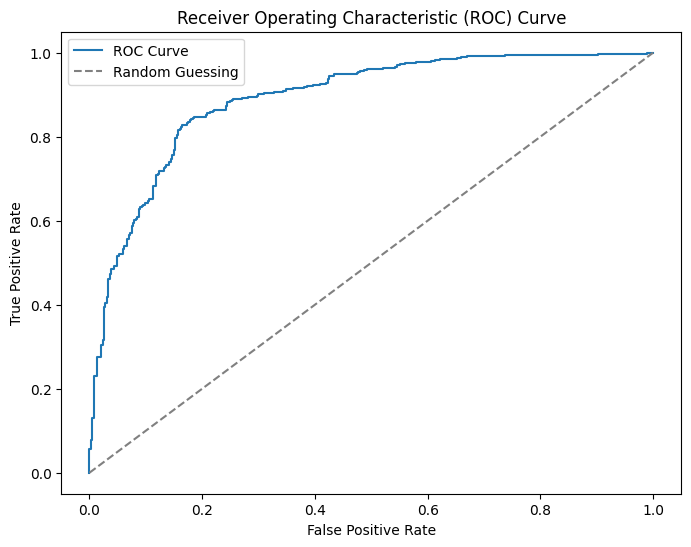

In [ ]:
y_pred = parent.load_and_predict(name, X_test)
parent.plot_roc_curve(y_test, parent.ravel(y_pred))

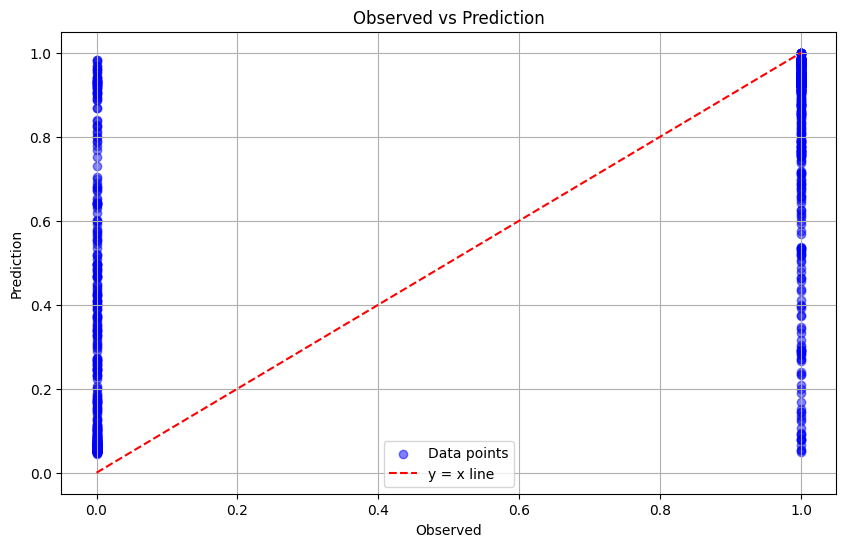

In [13]:
parent.plot_scatter(y_test, parent.ravel(y_pred))

In [10]:
loss

{'accuracy': 0.8271604938271605,
 'precision': 0.8190127970749543,
 'recall': 0.8906560636182903,
 'f1_score': 0.8533333333333334,
 'auc': 0.8898618597692197}